# Problem 1: EU Cities Temperatures Dataset

In [278]:
#imports
from pandas import Series
from pandas import DataFrame
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import random

## Preprocessing/Analysis

1. Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [180]:
cities_file = open("EuCitiesTemperatures.csv")
cities = pd.read_csv(cities_file)
cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [181]:
num_rows = cities.shape[0]
i = 0
while i < num_rows:
    country = cities.loc[i, 'country']
    cities_country = cities[cities['country'] == country]
    lat = cities.loc[i, 'latitude']
    lon = cities.loc[i, 'longitude']
    if pd.isna(lat):
        mean = cities_country['latitude'].mean()
        mean = round(mean, 2)
        cities.loc[i, 'latitude'] = mean
    if pd.isna(lon):
        mean = cities_country['longitude'].mean()
        mean = round(mean, 2)
        cities.loc[i, 'longitude'] = mean
    i = i + 1

In [182]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         213 non-null    object 
 1   country      213 non-null    object 
 2   population   213 non-null    float64
 3   EU           213 non-null    object 
 4   coastline    213 non-null    object 
 5   latitude     213 non-null    float64
 6   longitude    213 non-null    float64
 7   temperature  149 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.4+ KB


2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [183]:
cities_subset = cities[(cities['latitude'] >= 40) & (cities['latitude'] <= 60)]
cities_subset = cities_subset[(cities_subset['longitude'] >= 15) & (cities_subset['longitude'] <= 30)]
countries_max = cities_subset.country.mode()

In [184]:
cities_subset

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.63,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.63,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


In [185]:
countries_max

0     Poland
1    Romania
dtype: object

In [186]:
countries_max_str = countries_max[0]
i = 1
while i < len(countries_max):
    countries_max_str = countries_max_str + ', ' + countries_max[i]
    i = i + 1
    
print(f'The countries that have the max number of cities in this geographical band are: {countries_max_str}')

The countries that have the max number of cities in this geographical band are: Poland, Romania


3. Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

    For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [187]:
i = 0
while i < num_rows:
    temp = cities.loc[i, 'temperature']
    eu = cities.loc[i, 'EU']
    coast = cities.loc[i, 'coastline']
    if pd.isna(temp):
        eu_coast_subset = cities[(cities['EU'] == eu) & (cities['coastline'] == coast)]
        mean = eu_coast_subset['temperature'].mean()
        cities.loc[i, 'temperature'] = mean
    i = i + 1

In [188]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         213 non-null    object 
 1   country      213 non-null    object 
 2   population   213 non-null    float64
 3   EU           213 non-null    object 
 4   coastline    213 non-null    object 
 5   latitude     213 non-null    float64
 6   longitude    213 non-null    float64
 7   temperature  213 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.4+ KB


## Visualization

1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

In [203]:
eu_no_coast_no = cities[(cities['EU'] == 'no') & (cities['coastline'] == 'no')]
eu_no_coast_yes = cities[(cities['EU'] == 'no') & (cities['coastline'] == 'yes')]
eu_yes_coast_no = cities[(cities['EU'] == 'yes') & (cities['coastline'] == 'no')]
eu_yes_coast_yes = cities[(cities['EU'] == 'yes') & (cities['coastline'] == 'yes')]

136

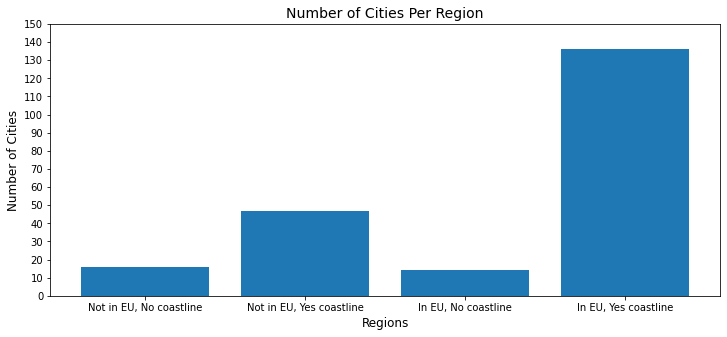

In [215]:
regions = ['Not in EU, No coastline','Not in EU, Yes coastline','In EU, No coastline','In EU, Yes coastline']
num_cities = [eu_no_coast_no.shape[0], eu_no_coast_yes.shape[0], eu_yes_coast_no.shape[0], eu_yes_coast_yes.shape[0]]
plt.figure(figsize=(12,5))
plt.bar(regions, num_cities)
plt.yticks(range(0,151,10))
plt.title('Number of Cities Per Region',fontsize=14)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Number of Cities',fontsize=12)
plt.show()

2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

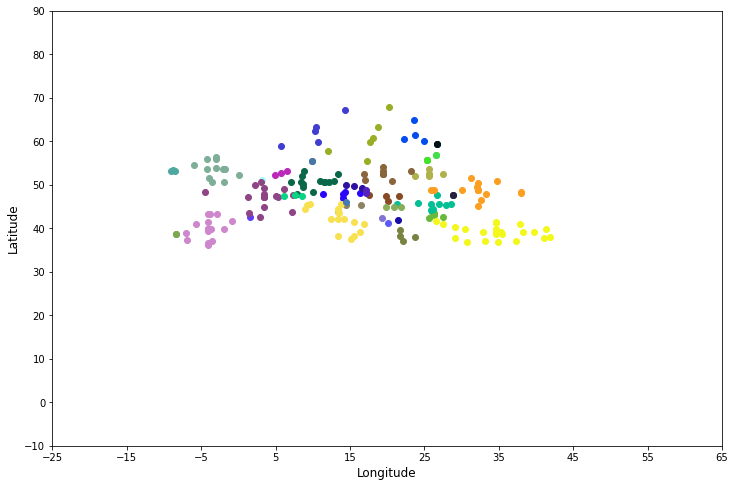

In [436]:
countries_lst = cities.country.unique()

plt.figure(figsize=(12,8))
for country in countries_lst:
    country_cities = cities[cities['country'] == country]
    x = []
    y = []
    for city in country_cities.iterrows():
        x.append(city[1].loc['longitude'])
        y.append(city[1].loc['latitude'])
    plt.scatter(x,y,color=np.random.rand(3,))
    
plt.xticks(range(-25,66,10))
plt.yticks(range(-10,91,10))
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.show()

3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

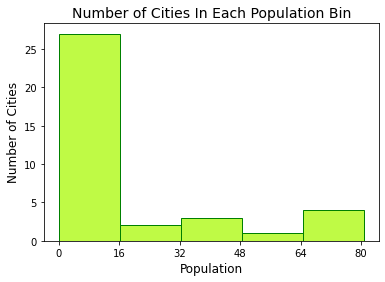

In [437]:
countries_lst
pops = []
for country in countries_lst:
    countrydf = cities[cities['country'] == country]
    pops.append(countrydf['population'].iloc[0])
    
max_pop = max(pops)
if max_pop % 5 == 0: 
    upper = max_pop
else: 
    upper = max_pop - max_pop % 5 + 5 
max_pop, upper

upper = int(upper)
    
plt.figure(figsize=(6,4))
plt.hist(pops,bins=5,color='#bffa45',edgecolor='green')
plt.xticks(range(0,upper+1,int(max_pop/5)))
plt.title('Number of Cities In Each Population Bin',fontsize=14)
plt.xlabel('Population',fontsize=12)
plt.ylabel('Number of Cities',fontsize=12)
plt.show()

4. Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

    Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

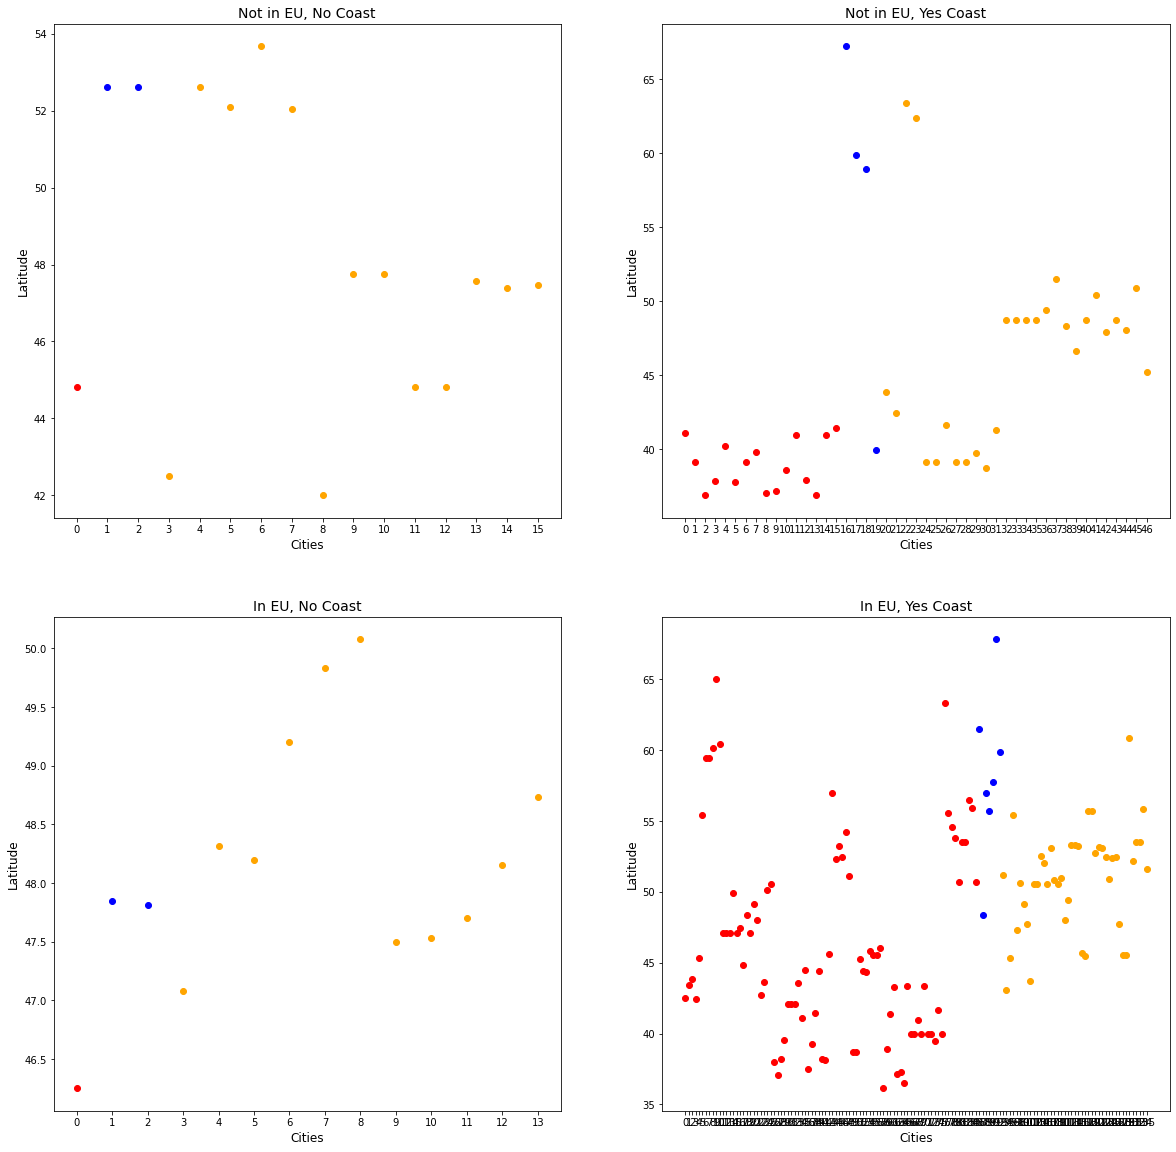

In [440]:
fig, axes = plt.subplots(2,2,figsize=(20,20))

#Not in EU, No Coast
eu_no_coast_no_red = eu_no_coast_no[eu_no_coast_no['temperature'] > 10]
eu_no_coast_no_blue = eu_no_coast_no[eu_no_coast_no['temperature'] < 6]
eu_no_coast_no_orange = eu_no_coast_no[(eu_no_coast_no['temperature'] >= 6) & (eu_no_coast_no['temperature'] <= 10)]

x = []
y = []
for row in eu_no_coast_no_red.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][0].scatter(x,y,color='red')

x = []
y = []
for row in eu_no_coast_no_blue.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][0].scatter(x,y,color='blue')

x = []
y = []
for row in eu_no_coast_no_orange.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][0].scatter(x,y,color='orange')

#Not in EU, Yes Coast
eu_no_coast_yes_red = eu_no_coast_yes[eu_no_coast_yes['temperature'] > 10]
eu_no_coast_yes_blue = eu_no_coast_yes[eu_no_coast_yes['temperature'] < 6]
eu_no_coast_yes_orange = eu_no_coast_yes[(eu_no_coast_yes['temperature'] >= 6) & (eu_no_coast_yes['temperature'] <= 10)]

x = []
y = []
for row in eu_no_coast_yes_red.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][1].scatter(x,y,color='red')

x = []
y = []
for row in eu_no_coast_yes_blue.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][1].scatter(x,y,color='blue')

x = []
y = []
for row in eu_no_coast_yes_orange.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[0][1].scatter(x,y,color='orange')

#In EU, No Coast
eu_yes_coast_no_red = eu_yes_coast_no[eu_yes_coast_no['temperature'] > 10]
eu_yes_coast_no_blue = eu_yes_coast_no[eu_yes_coast_no['temperature'] < 6]
eu_yes_coast_no_orange = eu_yes_coast_no[(eu_yes_coast_no['temperature'] >= 6) & (eu_yes_coast_no['temperature'] <= 10)]

x = []
y = []
for row in eu_yes_coast_no_red.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][0].scatter(x,y,color='red')

x = []
y = []
for row in eu_yes_coast_no_blue.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][0].scatter(x,y,color='blue')

x = []
y = []
for row in eu_yes_coast_no_orange.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][0].scatter(x,y,color='orange')

#In EU, Yes Coast
eu_yes_coast_yes_red = eu_yes_coast_yes[eu_yes_coast_yes['temperature'] > 10]
eu_yes_coast_yes_blue = eu_yes_coast_yes[eu_yes_coast_yes['temperature'] < 6]
eu_yes_coast_yes_orange = eu_yes_coast_yes[(eu_yes_coast_yes['temperature'] >= 6) & (eu_yes_coast_yes['temperature'] <= 10)]

x = []
y = []
for row in eu_yes_coast_yes_red.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][1].scatter(x,y,color='red')

x = []
y = []
for row in eu_yes_coast_yes_blue.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][1].scatter(x,y,color='blue')

x = []
y = []
for row in eu_yes_coast_yes_orange.iterrows():
    city = row[1]['city']
    lat = row[1]['latitude']
    x.append(city)
    y.append(lat)
axes[1][1].scatter(x,y,color='orange')


axes[0][0].set_xticks(range(0,eu_no_coast_no.shape[0]))
axes[0][0].set_xticklabels(range(0,eu_no_coast_no.shape[0]))
axes[0][0].set_title('Not in EU, No Coast',fontsize=14)
axes[0][0].set_xlabel('Cities',fontsize=12)
axes[0][0].set_ylabel('Latitude',fontsize=12)

axes[0][1].set_xticks(range(0,eu_no_coast_yes.shape[0]))
axes[0][1].set_xticklabels(range(0,eu_no_coast_yes.shape[0]))
axes[0][1].set_title('Not in EU, Yes Coast',fontsize=14)
axes[0][1].set_xlabel('Cities',fontsize=12)
axes[0][1].set_ylabel('Latitude',fontsize=12)

axes[1][0].set_xticks(range(0,eu_yes_coast_no.shape[0]))
axes[1][0].set_xticklabels(range(0,eu_yes_coast_no.shape[0]))
axes[1][0].set_title('In EU, No Coast',fontsize=14)
axes[1][0].set_xlabel('Cities',fontsize=12)
axes[1][0].set_ylabel('Latitude',fontsize=12)

axes[1][1].set_xticks(range(0,eu_yes_coast_yes.shape[0]))
axes[1][1].set_xticklabels(range(0,eu_yes_coast_yes.shape[0]))
axes[1][1].set_title('In EU, Yes Coast',fontsize=14)
axes[1][1].set_xlabel('Cities',fontsize=12)
axes[1][1].set_ylabel('Latitude',fontsize=12)

plt.show()